## Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

### It is a classification problem where we have to predict whether a loan would be approved or not. In Classification problem, we have to predict discrete values based on a given set of independent variable(s), Classification can be of two types:

### • Binary Classification: In this classification we have to predict either of the two given classes. For example: classifying the gender as male or female predicting the result as win or loss, etc
### • Multiclass Classification: Here we have to classify the data into three or more classes. For example: classifying a movie's genre as comedy action or romantic classify fruits as oranges, apples, or pears, etc.
### Loan prediction is a very common real-life problem that each retail bank faces atleast once in its lifetime. If done correctly. it can save a lot of man hours at the end of a retail bank.

### Although this course is specifically built to give you a walkthrough of Loan Prediction problem, you can always refer the content to get a comprehensive overview to solve a classification problem

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_original = pd.read_csv('../train_ctrUa4K.csv')
test_original = pd.read_csv('../test_lAUu6dG.csv')

In [3]:
train = train_original.copy()
test = test_original.copy()

In [4]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
train.shape

(614, 13)

In [10]:
test.shape

(367, 12)

In [11]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
# Much better representation is in terms of proportion
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

# Univariate Analysis

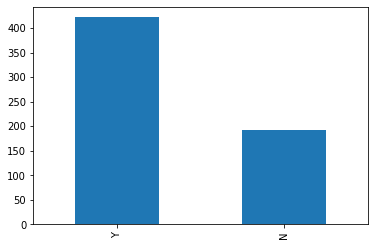

In [13]:
train['Loan_Status'].value_counts().plot.bar()

In [14]:
fig = plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

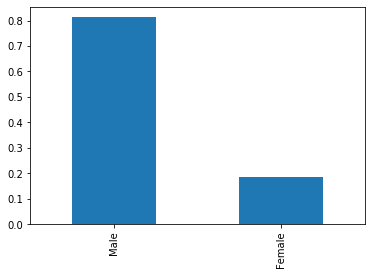

In [15]:
fig.subplots(221)
train['Gender'].value_counts(normalize=True).plot.bar()

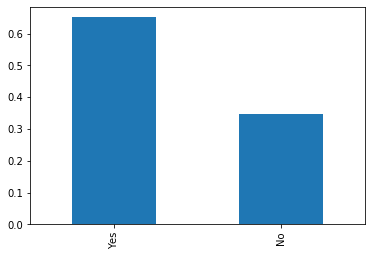

In [16]:
fig.subplots(222)
train['Married'].value_counts(normalize=True).plot.bar()

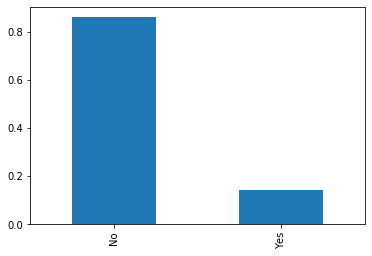

In [17]:
train['Self_Employed'].value_counts(normalize=True).plot.bar()

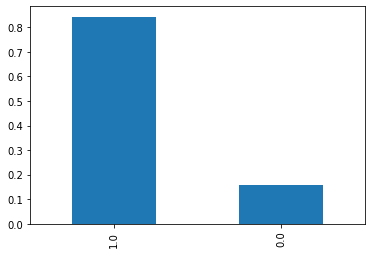

In [18]:
train['Credit_History'].value_counts(normalize=True).plot.bar()

In [19]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


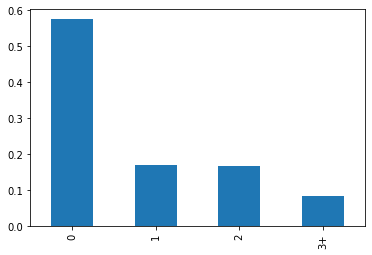

In [20]:
train['Dependents'].value_counts(normalize=True).plot.bar()

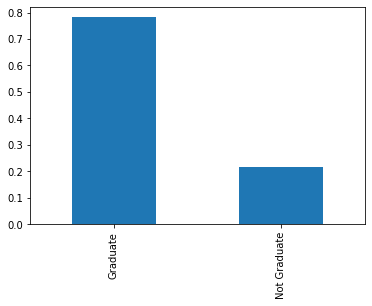

In [21]:
train['Education'].value_counts(normalize=True).plot.bar()

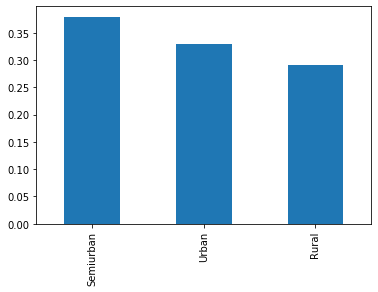

In [22]:
train['Property_Area'].value_counts(normalize=True).plot.bar()

In [23]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


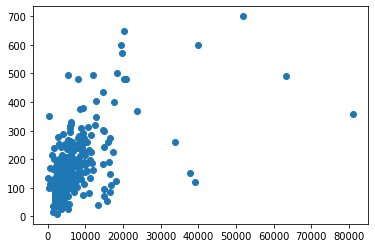

In [24]:
plt.scatter(train['ApplicantIncome'], train['LoanAmount'])

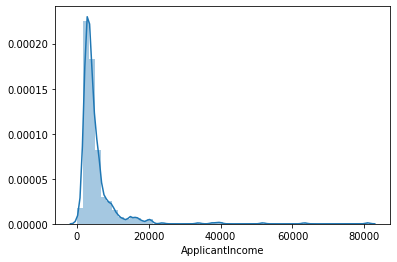

In [25]:
sns.distplot(train['ApplicantIncome']) # Skewed to the left, not normally distributed

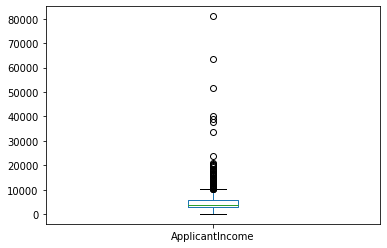

In [26]:
train['ApplicantIncome'].plot.box() # Too many outliers

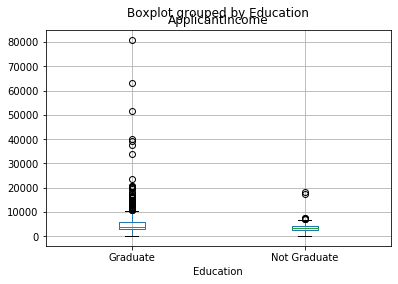

In [27]:
train.boxplot(column = 'ApplicantIncome', by='Education')

# Bivariate Analysis

In [28]:
Gender = pd.crosstab(train.Gender, train.Loan_Status)

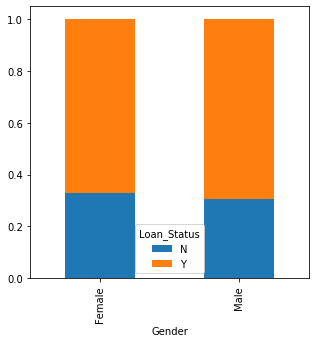

In [29]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(5,5))

In [30]:
Married = pd.crosstab(train.Married, train.Loan_Status)

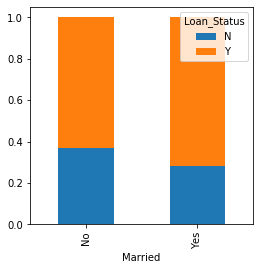

In [31]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(4,4))

In [32]:
Dependents = pd.crosstab(train.Dependents, train.Loan_Status)

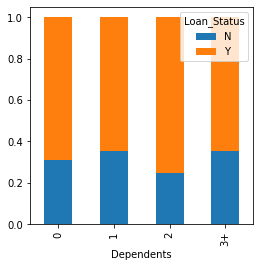

In [33]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(4,4))

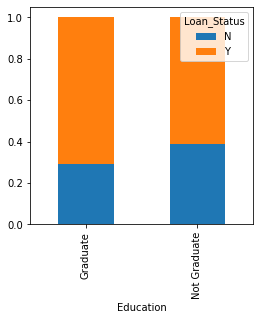

In [34]:
Education = pd.crosstab(train.Education, train.Loan_Status)
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(4,4))

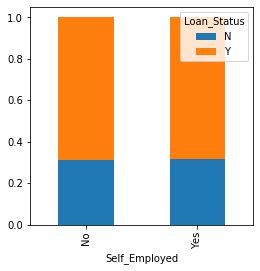

In [35]:
Employee = pd.crosstab(train.Self_Employed, train.Loan_Status)
Employee.div(Employee.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(4,4))

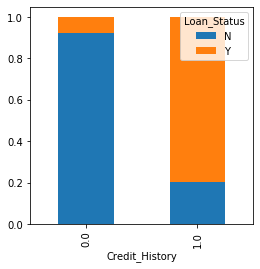

In [36]:
credit = pd.crosstab(train.Credit_History, train.Loan_Status)
credit.div(credit.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(4,4))

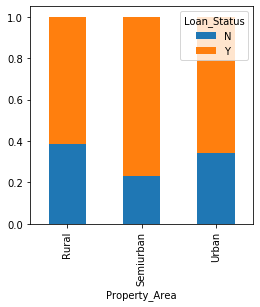

In [37]:
property_area = pd.crosstab(train.Property_Area, train.Loan_Status)
property_area.div(property_area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(4,4))

In [38]:
# More relationship between Numerical independent categorical and loan status. 

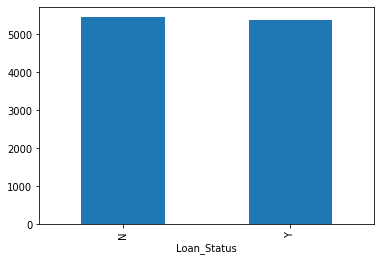

In [39]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar() # It is not clear about the internal distribution of incomes

In [40]:
bins = [0,2000,4000,10000,81000]
group = ['Low','Average','High','Very High']
train['income_dist'] = pd.cut(train['ApplicantIncome'],bins,labels=group)

In [41]:
income_dist = pd.crosstab(train['income_dist'],train['Loan_Status'])

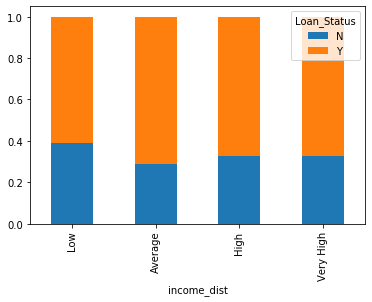

In [42]:
income_dist.div(income_dist.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True) 
# Our hypothesis that higher income means more loan approval is wrong as it is shown by the graph

In [43]:
bins = [0,2000,6000,42000]
group = ['Low','Average','High']
train['co_income_dist'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)

In [44]:
co_income_dist = pd.crosstab(train['co_income_dist'],train['Loan_Status'])

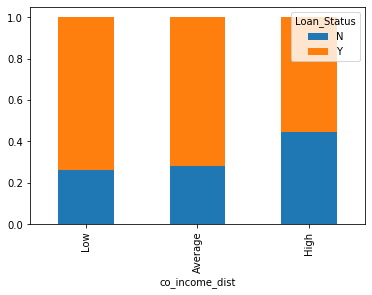

In [45]:
co_income_dist.div(co_income_dist.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
# It doesn't make sense since having lower income is counter intuitive in case of loan approval

In [46]:
# We should check the affect of total income on loan status
train['total_income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [47]:
bins = [0,2000,4000,10000,81000]
group = ['Low','Average','High','Very High']
train['total_income_dist'] = pd.cut(train['total_income'],bins,labels=group)

In [48]:
total_income_dist = pd.crosstab(train['total_income_dist'],train['Loan_Status'])

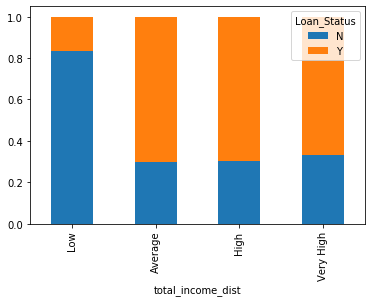

In [49]:
total_income_dist.div(total_income_dist.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True) 
# Now this looks more intuitive as having higher income converts more loans

In [50]:
# Now lets check the loan amount variable to check its affect on loan approvals
bins = [0,100,300,700]
group = ['Low','Average','High']
train['loanamount_dist'] = pd.cut(train['LoanAmount'],bins,labels=group)

In [51]:
loanamount_dist = pd.crosstab(train['loanamount_dist'],train['Loan_Status'])

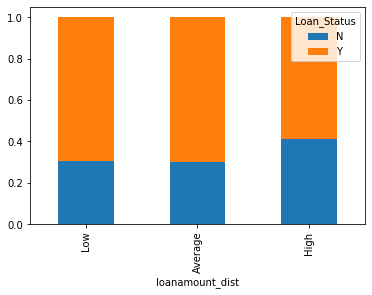

In [52]:
loanamount_dist.div(loanamount_dist.sum(1).astype(float), axis=0).plot(kind='bar',stacked = True)
# Average higher loan amount means more loan rejections

In [53]:
# Since not all algorithms take categorical values, we will convert them into numerical value
train['Dependents'].replace('3+',3, inplace=True)

In [54]:
test['Dependents'].replace('3+',3, inplace=True)

In [55]:
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

In [56]:
# Now dropping all the bin columns 
train = train.drop(['income_dist','co_income_dist','loanamount_dist','total_income_dist','total_income'], axis=1)

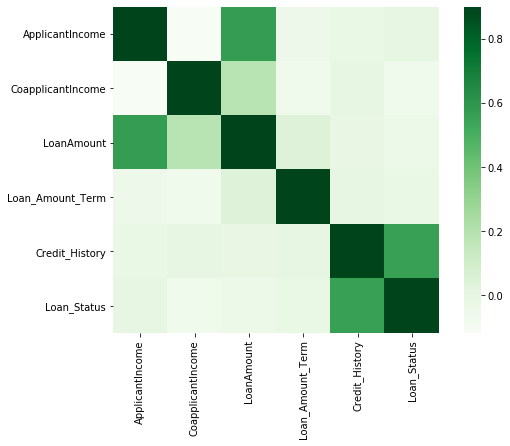

In [57]:
# Now using heatmap for finding the correlation between numerical features
matrix = train.corr()
fig,ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.9,square=True, cmap='Greens')

In [58]:
# Treating missing values
# For numerical values, we shall use mean or median to fill
# For categorical values, we shall use mode to fill
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [59]:
train.Gender.fillna(train.Gender.mode()[0],inplace=True)
train.Married.fillna(train.Married.mode()[0],inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0],inplace=True)
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)
train.Credit_History.fillna(train.Credit_History.mode()[0],inplace=True)

In [60]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [61]:
train.LoanAmount.fillna(train.LoanAmount.mode()[0],inplace=True)

In [62]:
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mode()[0],inplace=True)

In [63]:
test.Gender.fillna(test.Gender.mode()[0],inplace=True)
test.Married.fillna(test.Married.mode()[0],inplace=True)
test.Dependents.fillna(test.Dependents.mode()[0],inplace=True)
test.Self_Employed.fillna(test.Self_Employed.mode()[0],inplace=True)
test.Credit_History.fillna(test.Credit_History.mode()[0],inplace=True)
test.LoanAmount.fillna(test.LoanAmount.mode()[0],inplace=True)
test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mode()[0],inplace=True)

In [64]:
# One treatment for outliers is the use of logarithmic function so that large values become smaller and small values 
#remain unaffected

train.LoanAmount_log = np.log(train.LoanAmount)
test.LoanAmount_log = np.log(test.LoanAmount)

D:\Anaconda Navigator\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
D:\Anaconda Navigator\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


## Building Logistic Regression Model

In [65]:
# It is used for predicting binary classification problem
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [66]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [67]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [68]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [69]:
# Converting the categorical value with get_dummies
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [70]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,120.0,360.0,1.0,1,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


In [71]:
X.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049,0.182410,0.817590,0.346906,0.653094,0.083062,0.586319,0.166124,0.164495,0.781759,0.218241,0.866450,0.133550,0.291531,0.379479,0.328990
std,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.386497,0.386497,0.476373,0.476373,0.276201,0.492894,0.372495,0.371027,0.413389,0.413389,0.340446,0.340446,0.454838,0.485653,0.470229
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
# Splitting datascet into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [74]:
LR = LogisticRegression()

In [75]:
LR.fit(X_train,y_train)

D:\Anaconda Navigator\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
pred_y = LR.predict(X_test)

In [77]:
pred_y

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [78]:
accuracy_score(y_test,pred_y) # Our accuracy score is around 83% which is pretty good.

0.8108108108108109

# Logistic regression with stratified k-folds cross validation

In [80]:
from sklearn.model_selection import StratifiedKFold

In [94]:
k = StratifiedKFold(n_splits=5, shuffle=True)

In [93]:
for i in k.split(X,y):
    print(i)

(array([  0,   1,   2,   3,   5,   6,   7,   8,  12,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  24,  25,  27,  28,  29,  30,  31,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  45,  46,  47,
        48,  49,  52,  53,  55,  56,  57,  58,  59,  60,  62,  64,  65,
        66,  67,  68,  70,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 102, 103, 104, 106, 107, 108, 109,
       110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 144, 146, 147, 149, 150, 152, 153, 154,
       155, 157, 158, 160, 161, 162, 164, 165, 166, 167, 168, 171, 173,
       175, 177, 180, 181, 182, 183, 185, 186, 187, 189, 190, 191, 192,
       193, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 208,
       209, 210, 211, 213, 214, 215, 216, 217, 218, 219, 220, 2

In [99]:
i=1
for train_index, test_index in k.split(X,y):
    print('\n{} of kfold {}'.format(i,k.n_splits))
    i+=1
    
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]

    model = LogisticRegression()
    model.fit(xtr,ytr)

    pred_test = model.predict(xvl)

    score = accuracy_score(yvl, pred_test)

    print('accuracy_score', score)



pred_test = model.predict(test)

pred = model.predict_proba(xvl)[:,1]  # We have got the mean accuracy of the new model as 81%, same as before! 


1 of kfold 5
accuracy_score 0.7560975609756098

2 of kfold 5
accuracy_score 0.8292682926829268

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.8114754098360656


D:\Anaconda Navigator\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda Navigator\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio